<a href="https://colab.research.google.com/github/alirezzzzz/V2ray-for-Doprax/blob/main/chapter_appendix-tools-for-deep-learning/jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from csv import reader
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import euclidean

In [3]:
def load_csv(filename):
  dataset=list()
  with open(filename,"r") as file:
    csv_reader=reader(file)
    next(csv_reader)
    for i in csv_reader:
      if not i:
        continue
      dataset.append([float(value) if value.strip() != "" else np.nan for value in i ])
  return np.array(dataset, dtype=np.float32)

In [4]:
Data_1=load_csv('ball_mill_1.csv')
Data_2=load_csv('ball_mill_2.csv')

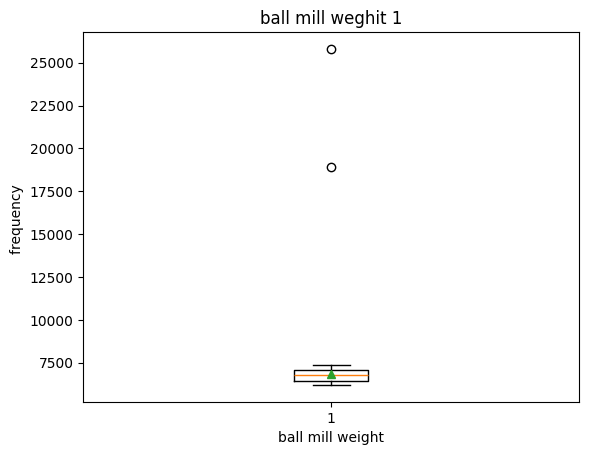

[[6.832e+03 1.960e+02 1.960e+02 ...       nan 1.410e+00 2.300e+01]
 [6.844e+03 1.950e+02 2.000e+02 ...       nan 1.380e+00 2.480e+01]
 [6.875e+03 1.920e+02 1.970e+02 ...       nan 1.360e+00 2.580e+01]
 ...
 [7.346e+03 2.010e+02 1.990e+02 ...       nan 1.410e+00 2.360e+01]
 [7.325e+03 2.000e+02 2.010e+02 ...       nan 1.420e+00 2.320e+01]
 [7.353e+03 2.020e+02 2.010e+02 ...       nan 1.420e+00 2.480e+01]]


In [5]:
plt.boxplot(Data_1[:, 0], showmeans=True)
plt.title("ball mill weghit 1")
plt.xlabel("ball mill weight")
plt.ylabel("frequency ")
plt.show()
print(Data_1)


In [6]:
df1=pd.DataFrame(Data_1,columns=["ball_mill_weight","T1","T2","T3","Blower","Bag house","","Pb density","Free Pb"])
for j in df1.columns:
  print(f"\nValue counts for column: {j}")
  counts=df1[j].value_counts(dropna=False)
  print(counts)


Value counts for column: ball_mill_weight
ball_mill_weight
6445.0    9
6849.0    7
6422.0    6
6431.0    5
6449.0    5
         ..
6242.0    1
6217.0    1
6319.0    1
6330.0    1
6347.0    1
Name: count, Length: 230, dtype: int64

Value counts for column: T1
T1
198.0     59
200.0     47
199.0     45
201.0     43
197.0     39
196.0     32
193.0     26
195.0     26
194.0     20
192.0     16
190.0     11
202.0     10
191.0      8
171.0      8
187.0      7
203.0      6
180.0      5
177.0      5
186.0      5
168.0      5
170.0      4
184.0      3
182.0      3
189.0      3
175.0      3
179.0      3
142.0      2
174.0      2
164.0      2
167.0      2
169.0      2
6453.0     1
181.0      1
173.0      1
188.0      1
97.0       1
185.0      1
165.0      1
162.0      1
172.0      1
Name: count, dtype: int64

Value counts for column: T2
T2
200.0       73
201.0       67
199.0       59
197.0       48
202.0       48
198.0       36
196.0       28
195.0       15
193.0       11
194.0       11
203.0    

In [7]:
removal=len(df1)* 0.1
df1_new=df1.dropna(axis=1,thresh=removal)
print(df1_new)

     ball_mill_weight     T1     T2     T3  Blower  Bag house  Pb density  \
0              6832.0  196.0  196.0  198.0   518.0      297.0        1.41   
1              6844.0  195.0  200.0  199.0   508.0      303.0        1.38   
2              6875.0  192.0  197.0  196.0   512.0      301.0        1.36   
3              6850.0  197.0  196.0  199.0   498.0      303.0        1.40   
4              6832.0  198.0  200.0  200.0   521.0      303.0        1.35   
..                ...    ...    ...    ...     ...        ...         ...   
456            7079.0  197.0  201.0  199.0   510.0      359.0        1.38   
457            7327.0  202.0  202.0  197.0   553.0      351.0        1.40   
458            7346.0  201.0  199.0  194.0   575.0      312.0        1.41   
459            7325.0  200.0  201.0  201.0   581.0      342.0        1.42   
460            7353.0  202.0  201.0  199.0   588.0      359.0        1.42   

       Free Pb  
0    23.000000  
1    24.799999  
2    25.799999  
3    25

In [ ]:
def Hellinger(p,q):
  p=np.array(p)/np.sum(p)
  q=np.array(q)/np.sum(q)
  return (1 / np.sqrt(2)) * np.sqrt(np.sum((np.sqrt(p) - np.sqrt(q))**2))

DF_part1=df1_new.sample(frac==0.5,random_state=42)
DF_part2=df1_new.drop(DF_part1.index)
p,_=np.histogram(DF_part1[:,0],bins=10,density=True)
q,_=np.histogram(DF_part2[:,0],bins=10,density=True)
distance=Hellinger(p,q)
if distance > 0.2:
  print(f'warning')
else:
  print(f"ok")

# print(f'{distance} the hellinger disturbution')
